In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

df_translation = pd.read_csv('/home/danielbarr3ra/PythonPractice/translation.gz',header = None, sep ='\n',nrows=680)
df_source = pd.read_csv('/home/danielbarr3ra/PythonPractice/source.gz', header = None, sep= '\n', nrows= 680)

data = pd.concat([df_translation,df_source], axis = 1)
data.columns = ["translation", "original"]



In [9]:
data["length english"], data["length spanish"] =  data["translation"].apply(lambda x : len(x)),data["original"].apply(lambda x : len(x))

In [11]:
data["Difference in word count"] =  data["length english"] - data["length spanish"]

In [13]:
#how succint will the data be compare to spanish and english 
data

,translation,original,vowels original,vowels translated,length english,length spanish,Difference in word count
0,"On its banks was founded the city of Turmero, ...",En sus riberas fue fundada la ciudad de Turmer...,0.360465,0.305785,242,258,-16
1,He first married Princess Beatrice of Bourbon-...,Contrajo nupcias por primera vez con la prince...,0.339506,0.328571,140,162,-22
2,The date of joining the Peruvian Army was mid-...,La fecha de incorporación al Ejército Peruano ...,0.362319,0.294118,51,69,-18
3,"She is a naive, shrewd, sincere and honest you...","Es una joven ingenua, astuta, sincera y honest...",0.373418,0.307229,166,158,8
4,The first generation Jetta continued its produ...,El Jetta de primera generación continuó su pro...,0.316384,0.323864,176,177,-1
...,...,...,...,...,...,...,...
675,"What a long, lonely time![1] In routine clinic...",¡Qué tiempo largo y solitario![1] En la atenci...,0.378238,0.311828,186,193,-7
676,"[5] In April 1828, Commander Parker King and A...",[5] En abril de 1828 el comandante Parker King...,0.315152,0.283237,173,165,8
677,The first ascent to Mount Beluja was made in 1...,El primer ascenso al monte Beluja fue realizad...,0.325000,0.260274,73,80,-7
678,"In October, Diamond Dallas Page and his wife K...","En octubre, Diamond Dallas Page y su esposa Ki...",0.325301,0.308642,81,83,-2


In [ ]:

pyplot.hist(data["Difference in word count"], alpha=0.5, label='difference in length', bins= 30, range = [-50,50])

pyplot.legend(loc='upper right')
pyplot.show()

#data.loc[data['Difference in word count'].idxmin()] the outlier seems to be a data

In [6]:
#data.loc[data['Difference in word count'].idxmin()]

In [8]:
## number of vowels standarized by lenght of sentencde
data["vowels original"] = data["original"].apply(lambda x,vowels = ['a', 'e', 'i', 'o', 'u'] :  len([i for i in x.lower() if i in vowels])/len(x)) 

data["vowels translated"] = data["translation"].apply(lambda x,vowels = ['a', 'e', 'i', 'o', 'u'] :  len([i for i in x.lower() if i in vowels])/len(x)) 

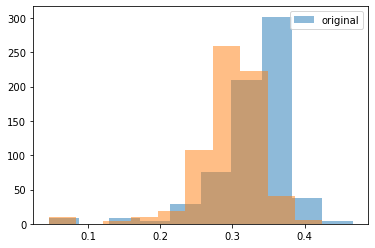

In [10]:

pyplot.hist(data["vowels original"], alpha=0.5, label='original')
pyplot.hist(data["vowels translated"], alpha=0.5, label='')
pyplot.legend(loc='upper right')
pyplot.show()

In [12]:
def commonWords( s0, s1):
    s0 = s0.lower()
    s1 = s1.lower()
    s0List = s0.split(" ")
    s1List = s1.split(" ")
    return len(list(set(s0List)&set(s1List)))


In [19]:
#x = data["original"][10]
#c=data[data["original"] == x].index[0]
#y = data["translation"][data[data["original"] == x].index[0]]
a =  commonWords(data["original"][0],data["translation"][0])
data["common words"] = data["original"].apply(lambda x  :  commonWords(x,data["translation"][data[data["original"] == x].index[0]])) 

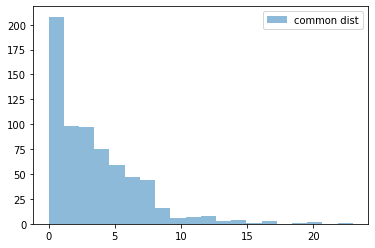

In [30]:

pyplot.hist(data["common words"], alpha=0.5, label='common dist',bins = 20)
pyplot.legend(loc='upper right')
pyplot.show()

In [27]:
data.iloc[1,1]

'Contrajo nupcias por primera vez con la princesa Beatriz de Borbón-Dos Sicilias, con quien tuvo a sus hijos Carolina María Bonaparte y a Juan Cristóbal Bonaparte.'